# Simulate data for the population
Get the 10% of the actual population as a representative sample

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4th cast: miners and farmers

The reason behind choosing this specific distribution is explained in more depth in the Obsidian notes. 
Short: Brazilian favelas have the median age of 30, which is same for the entire population of El Salvador, which is the closest I could get to favela population. 
I calculate the variance of the distribution using El Salvadors age pyramid data from US Census Bureau dataset. 

### Get 4th cast sample age and sex

In [6]:
def avg(x, y):
    return (x + y) / 2

women, men = 0.517, 0.483
divider = 6800000
sample_size = int((35200 + 28000) * 0.015)

def simulateWomanPopulation(women, sample_size):
    sample_size = int(round(sample_size * women, 0))
    bins = np.array([19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 90])
    probs = np.array([0.041, 0.043, 0.047, 0.045, 0.039, 0.034, 0.032, 0.028, 0.025, 0.021, 0.017, 0.013, 0.009, 0.006])
    probs = probs / probs.sum()
    bin_indices = np.random.choice(len(probs), size=sample_size, p=probs)
    samples = np.random.uniform(bins[bin_indices], bins[bin_indices+1])
    return samples

def simulateManPopulation(men, sample_size):
    sample_size = int(round(sample_size * men, 0)) 
    bins = np.array([19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 90])
    probs = np.array([0.043, 0.045, 0.047, 0.044, 0.036, 0.030, 0.026, 0.022, 0.017, 0.015, 0.012, 0.009, 0.007, 0.005])
    probs = probs / probs.sum()
    bin_indices = np.random.choice(len(probs), size=sample_size, p=probs)
    samples = np.random.uniform(bins[bin_indices], bins[bin_indices+1])
    return samples

    
women_sample = simulateWomanPopulation(women, sample_size)
men_sample = simulateManPopulation(men, sample_size)
cast4_population_sample = pd.DataFrame({
    "idx":range(0, sample_size),
    "age":np.concatenate(
        [np.round(women_sample, 0).astype('int'),
          np.round(men_sample, 0).astype('int')]
          ), 
    'sex':np.concatenate(
        [np.zeros(int(round(women * sample_size, 0))).astype('int'),
          np.ones(int(round(men * sample_size, 0))).astype('int')]
          )
})

cast4_population_sample.head()

,idx,age,sex
0,0,41,0
1,1,32,0
2,2,26,0
3,3,83,0
4,4,62,0


/var/folders/41/f2g8g_gx5mxdj1zjg_yp7_c40000gn/T/ipykernel_5472/1817566187.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['age_group', 'sex'])


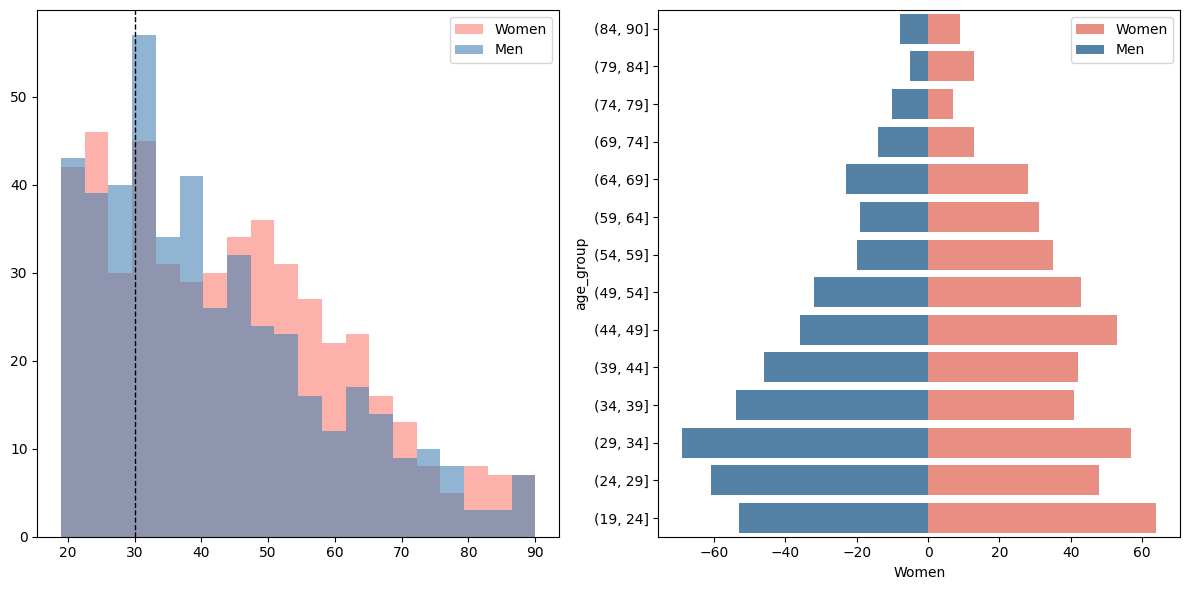

In [48]:
# create plots for the age groups in cast 4
men = cast4_population_sample[cast4_population_sample['sex'] == 1]['age']
women = cast4_population_sample[cast4_population_sample['sex'] == 0]['age']
bins = np.array([19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79, 84, 90])
cast4_population_sample['age_group'] = pd.cut(cast4_population_sample['age'], bins)

age_pyramid = (
    cast4_population_sample
    .groupby(['age_group', 'sex'])
    .size()
    .reset_index(name='count')
)
pyramid = age_pyramid.pivot(index='age_group', columns='sex', values='count').fillna(0)
pyramid.columns = ['Women', 'Men']
pyramid['Men'] = -pyramid['Men']
pyramid = pyramid.iloc[::-1, ::-1]

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(women, bins=20, alpha=0.6, label='Women', color='salmon')
ax1.axvline(30, color='k', linestyle='dashed', linewidth=1)
ax1.hist(men, bins=20, alpha=0.6, label='Men', color='steelblue')
ax1.legend()

sns.barplot(
    x='Women', y=pyramid.index, data=pyramid.reset_index(), color='salmon', label='Women', order = pyramid.index

)
sns.barplot(
    x='Men', y=pyramid.index, data=pyramid.reset_index(), color='steelblue', label='Men', order = pyramid.index
)
plt.tight_layout()
plt.show()

## Get 4th cast monthly income